In [1]:
# import tensorflow
# import keras
# from tensorflow.keras.applications import ResNet50
# from tensorflow.keras.models import Model
# from keras.applications.resnet50 import preprocess_input
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# from tensorflow.keras.layers import Flatten
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix
from mlxtend.classifier import StackingClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import os
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc, classification_report, precision_score, recall_score, f1_score
from xgboost import XGBClassifier
import seaborn as sns

In [ ]:
df = pd.read_csv(r"C:\Users\jainashi\Downloads\features_and_labels_without_augmentation.csv\features_and_labels_without_augmentation.csv")

In [ ]:
df

,0,1,2,3,4,5,6,7,8,9,...,100343,100344,100345,100346,100347,100348,100349,100350,100351,100352
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.780849,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.028870,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.897952,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.666661,0.0,0.0,2.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.410594,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1627,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.346818,0.0,0.0,2.0
1628,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.941223,0.0,0.0,0.0
1629,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.862790,0.0,0.0,2.0
1630,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.442727,0.0,0.0,2.0


In [ ]:
# Separate features and labels
X = df.iloc[:, :-1].values  # all columns except the last
y = df.iloc[:, -1].astype(int).values  # last column as integer labels

In [ ]:
# 20 % training dataset is considered for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
KNC = KNeighborsClassifier()   # initialising KNeighbors Classifier
NB = GaussianNB()              # initialising Naive Bayes
LR = LogisticRegression()
SVM = SVC(kernel='linear', probability=True)
RF = RandomForestClassifier(n_estimators=100, random_state=42)


In [ ]:
model_kNeighborsClassifier = KNC.fit(X_train, y_train)   # fitting Training Set
pred_knc = model_kNeighborsClassifier.predict(X_test)   # Predicting on test dataset

In [ ]:
acc_knc = accuracy_score(y_test, pred_knc)  # evaluating accuracy score
print('accuracy score of KNeighbors Classifier is:', acc_knc * 100)

accuracy score of KNeighbors Classifier is: 93.57798165137615


In [ ]:
model_NaiveBayes = NB.fit(X_train, y_train)
pred_nb = model_NaiveBayes.predict(X_test)

In [ ]:
acc_nb = accuracy_score(y_test, pred_nb)
print('Accuracy of Naive Bayes Classifier:', acc_nb * 100)

Accuracy of Naive Bayes Classifier: 62.99694189602446


In [ ]:
model_LRClassifier = LR.fit(X_train, y_train)   # fitting Training Set
pred_lr = model_LRClassifier.predict(X_test)

c:\Users\jainashi\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
acc_lr = accuracy_score(y_test, pred_lr)  # evaluating accuracy score
print('accuracy score of Logistic Regression Classifier is:', acc_lr * 100)

accuracy score of Logistic Regression Classifier is: 70.9480122324159


In [ ]:
model_SVMClassifier = SVM.fit(X_train, y_train)   # fitting Training Set
pred_svm = model_SVMClassifier.predict(X_test)

In [ ]:
acc_svm = accuracy_score(y_test, pred_lr)  # evaluating accuracy score
print('accuracy score of Support Vector Machine Classifier is:', acc_svm * 100)

accuracy score of Support Vector Machine Classifier is: 70.9480122324159


In [ ]:
model_RFClassifier = RF.fit(X_train, y_train)   # fitting Training Set
pred_rf = model_RFClassifier.predict(X_test)

In [ ]:
acc_rf = accuracy_score(y_test, pred_rf)  # evaluating accuracy score
print('accuracy score of Random Forest Classifier is:', acc_rf * 100)

accuracy score of Random Forest Classifier is: 89.90825688073394


In [ ]:
xgb = XGBClassifier(n_estimators=100, learning_rate=0.1)
model_XGBClassifier = xgb.fit(X_train, y_train)   # fitting Training Set
pred_xgb = model_XGBClassifier.predict(X_test)

In [ ]:
acc_xgb = accuracy_score(y_test, pred_xgb)  # evaluating accuracy score
print('accuracy score of XGBoost Classifier is:', acc_xgb * 100)

accuracy score of XGBoost Classifier is: 92.04892966360856


In [ ]:
# Stacking classifier
stack = StackingClassifier(classifiers=[KNC, NB, SVM, LR, RF], meta_classifier=xgb)

# Train
stack.fit(X_train, y_train)

# Predict
y_pred = stack.predict(X_test)

c:\Users\jainashi\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
acc_stack = accuracy_score(y_test, y_pred)  # evaluating accuracy
print('accuracy score of Stacked model:', acc_stack * 100)

accuracy score of Stacked model: 95.10703363914374


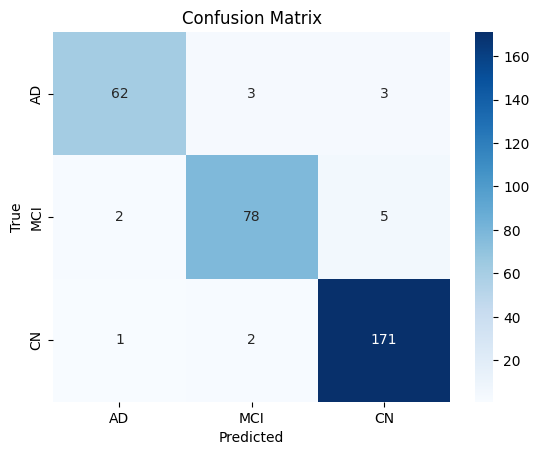

In [ ]:
# Confusion matrix
classes = ['AD', 'MCI', 'CN']
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

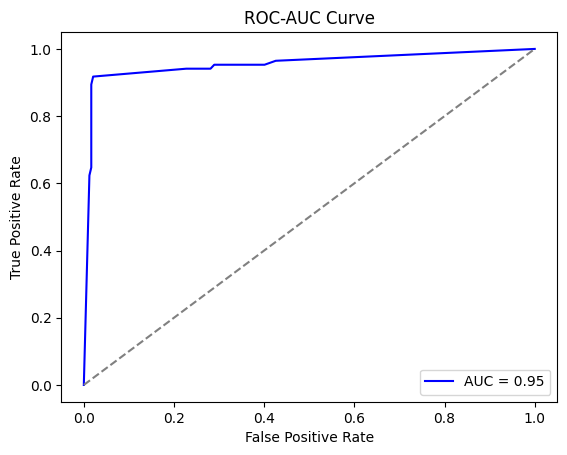

In [ ]:
# ROC-AUC curve
probs = stack.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, probs[:, 1], pos_label=1)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='blue', label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('ROC-AUC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

In [ ]:
precision = precision_score(y_test, y_pred, average='weighted')  # or 'micro', 'macro'
print("Precision:", precision)

Precision: 0.9509618355381604


In [ ]:
# Calculate recall (sensitivity)
recall = recall_score(y_test, y_pred, average='weighted')
print("Recall (Sensitivity):", recall)

Recall (Sensitivity): 0.9510703363914373


In [ ]:
# Calculate F1-score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1-Score:", f1)

F1-Score: 0.95077972890487


In [ ]:
print(f"Accuracy: {acc_stack * 100:.2f}%")
print(f"Precision: {precision* 100:.2f}%")
print(f"Recall (Sensitivity): {recall* 100:.2f}%")
print(f"F1-Score: {f1* 100:.2f}%")

Accuracy: 95.11%
Precision: 95.10%
Recall (Sensitivity): 95.11%
F1-Score: 95.08%
